Homework 2 - Classification

二元分類是機器學習中最基礎的問題之一，在這份教學中，你將學會如何實作一個線性二元分類器，來根據人們的個人資料，判斷其年收入是否高於 50,000 美元。我們將以兩種方法: logistic regression 與 generative model，來達成以上目的，你可以嘗試了解、分析兩者的設計理念及差別。

In [1]:
import numpy as np

np.random.seed(0)
X_train_fpath = './data/X_train'
Y_train_fpath = './data/Y_train'
X_test_fpath = './data/X_test'
output_fpath = './output_{}.csv'

with open(X_train_fpath) as f:
    next(f)
    X_train = np.array([line.strip('\n').split(',')[1:]
                       for line in f], dtype=float)
with open(Y_train_fpath) as f:
    next(f)
    Y_train = np.array([line.strip('\n').split(',')[1]
                       for line in f], dtype=float)
with open(X_test_fpath) as f:
    next(f)
    X_test = np.array([line.strip('\n').split(',')[1:]
                      for line in f], dtype=float)

In [2]:
X_train.shape

(54256, 510)

In [3]:
# 檢查訓練集中的缺失值
missing_values_train = np.isnan(X_train).sum(axis=0)
print("Missing Values in Training Set:\n", missing_values_train)

# 檢查開發集中的缺失值
missing_values_dev = np.isnan(Y_train).sum(axis=0)
print("Missing Values in Development Set:\n", missing_values_dev)

# 檢查測試集中的缺失值
missing_values_test = np.isnan(X_test).sum(axis=0)
print("Missing Values in Test Set:\n", missing_values_test)

Missing Values in Training Set:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [4]:
print("Training Data Statistics:")
print("Mean:\n", np.mean(X_train, axis=0))
print("Standard Deviation:\n", np.std(X_train, axis=0))
print("Minimum:\n", np.min(X_train, axis=0))
print("Maximum:\n", np.max(X_train, axis=0))

Training Data Statistics:
Mean:
 [4.08819670e+01 5.00202743e-01 3.21439104e-02 3.06694191e-02
 6.08964907e-02 2.94511206e-01 9.21557063e-04 2.42369508e-02
 2.08271896e-03 5.43350044e-02 1.84311413e-05 1.37127691e-02
 1.01186965e-02 7.24343851e-03 2.61722206e-03 4.01798879e-03
 4.71837216e-03 1.10586848e-03 2.74071070e-02 1.07342967e-01
 9.98967856e-03 9.78693601e-03 5.89796520e-03 2.87341492e-02
 2.20620761e-02 2.65224123e-02 1.83758478e-02 4.20230021e-03
 4.20230021e-03 1.34363020e-02 3.37289885e-03 8.62577411e-03
 3.46874078e-02 9.62105574e-03 1.08006488e-02 1.07269242e-02
 1.12429962e-03 3.29917428e-03 3.87053966e-04 5.41875553e-03
 6.17443232e-03 1.33625774e-02 3.04298142e-02 3.72124742e-02
 1.59060749e-02 5.86847538e-02 8.47832498e-04 2.77020053e-02
 1.08743733e-02 1.33072840e-02 4.79209673e-03 2.96593925e-01
 5.45561781e-03 3.42819227e-03 3.40976113e-03 4.13779121e-02
 3.64936597e-03 4.03641994e-03 7.44618107e-03 1.51135358e-03
 2.58035978e-04 3.96269537e-03 2.49189030e-02 8.1465

In [5]:
import pandas as pd
print("Features Statistical Description:")
print(pd.DataFrame(X_train).describe())

Features Statistical Description:
                0             1             2             3             4    \
count  54256.000000  54256.000000  54256.000000  54256.000000  54256.000000   
mean      40.881967      0.500203      0.032144      0.030669      0.060896   
std       18.435235      0.500005      0.176384      0.172422      0.239143   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       28.000000      0.000000      0.000000      0.000000      0.000000   
50%       40.000000      1.000000      0.000000      0.000000      0.000000   
75%       52.000000      1.000000      0.000000      0.000000      0.000000   
max       90.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  54256.000000  54256.000000  54256.000000  54256.000000  54256.000000   
mean       0.294511      0.000922      0.024237      0.002083      0.054335   
std        0.4558

In [6]:
correlation_matrix = pd.DataFrame(X_train).corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          0         1         2         3         4         5         6    \
0    1.000000 -0.154451  0.055565  0.002536  0.064258  0.098702 -0.005835   
1   -0.154451  1.000000 -0.182314 -0.177948 -0.254751 -0.646371 -0.030383   
2    0.055565 -0.182314  1.000000 -0.032416 -0.046407 -0.117747 -0.005535   
3    0.002536 -0.177948 -0.032416  1.000000 -0.045296 -0.114927 -0.005402   
4    0.064258 -0.254751 -0.046407 -0.045296  1.000000 -0.164530 -0.007734   
..        ...       ...       ...       ...       ...       ...       ...   
505 -0.461623 -0.249413 -0.045435 -0.044346 -0.063487  0.385866 -0.007572   
506  0.121494 -0.058260  0.003452 -0.005520 -0.007080  0.062926 -0.003598   
507 -0.031903  0.517431  0.130007  0.103123  0.127517 -0.821228  0.006923   
508 -0.033464 -0.027840 -0.001433 -0.007968  0.004724  0.032731  0.003197   
509  0.033464  0.027840  0.001433  0.007968 -0.004724 -0.032731 -0.003197   

          7         8         9    ...       500       

In [7]:
full_data = pd.DataFrame(X_train)
full_data['label'] = Y_train
feature_label_correlation = full_data.corr()['label'].sort_values()
print("Feature-Label Correlation:")
print(feature_label_correlation)

Feature-Label Correlation:
192     -0.264260
51      -0.248785
148     -0.248785
169     -0.248785
100     -0.248785
           ...   
175      0.292163
507      0.322915
label    1.000000
286           NaN
302           NaN
Name: label, Length: 511, dtype: float64


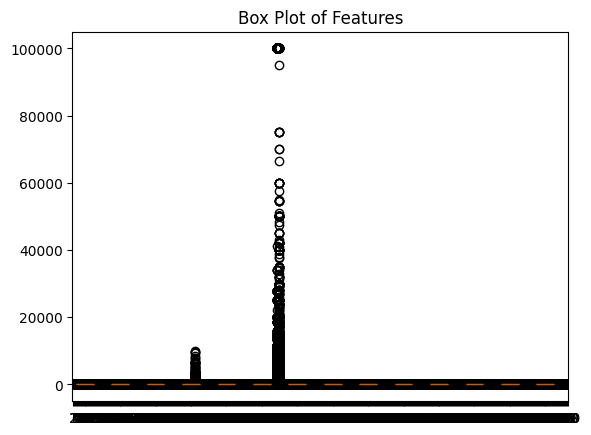

In [8]:
import matplotlib.pyplot as plt
plt.boxplot(X_train)
plt.title("Box Plot of Features")
plt.show()

In [9]:
for i in range(X_train.shape[1]):
    Q1 = np.percentile(X_train[:, i], 25)
    Q3 = np.percentile(X_train[:, i], 75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR

    X_train[:, i] = np.where(X_train[:, i] > Q3 +
                             outlier_step, Q3, X_train[:, i])
    X_train[:, i] = np.where(X_train[:, i] < Q1 -
                             outlier_step, Q1, X_train[:, i])

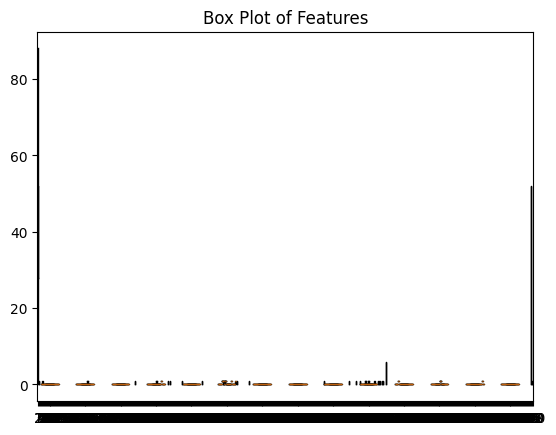

In [10]:
import matplotlib.pyplot as plt
plt.boxplot(X_train)
plt.title("Box Plot of Features")
plt.show()

In [11]:
def _normalize(X, train=True, specified_column=None, X_mean=None, X_std=None):

    if specified_column == None:  # 如果沒有指定 specified_column，則對 X 中的所有列進行正規化
        specified_column = np.arange(X.shape[1])
    # 如果是訓練階段（train=True），則計算指定列的平均值 (X_mean) 和標準差 (X_std)
    if train:
        X_mean = np.mean(X[:, specified_column], 0).reshape(1, -1)
        X_std = np.std(X[:, specified_column], 0).reshape(1, -1)

    # 使用計算出的平均值和標準差來正規化指定的列，這裡的 1e-8 是為了避免除以零的情況
    X[:, specified_column] = (X[:, specified_column] - X_mean) / (X_std + 1e-8)
    # 函數返回正規化後的 X，以及用於正規化的 X_mean 和 X_std
    return X, X_mean, X_std


def _train_dev_split(X, Y, dev_ratio=0.25):
    # dev_ratio=0.25 表示開發集（驗證集）佔總數據的比例
    train_size = int(len(X) * (1 - dev_ratio))
    return X[:train_size], Y[:train_size], X[train_size:], Y[train_size:]


X_train, X_mean, X_std = _normalize(X_train, train=True)
X_test, _, _ = _normalize(
    X_test, train=False, specified_column=None, X_mean=X_mean, X_std=X_std)

dev_ratio = 0.1
X_train, Y_train, X_dev, Y_dev = _train_dev_split(
    X_train, Y_train, dev_ratio=dev_ratio)

train_size = X_train.shape[0]
dev_size = X_dev.shape[0]
test_size = X_test.shape[0]
data_dim = X_train.shape[1]
print('Size of training set: {}'.format(train_size))
print('Size of development set: {}'.format(dev_size))
print('Size of testing set: {}'.format(test_size))
print('Dimension of data: {}'.format(data_dim))

Size of training set: 48830
Size of development set: 5426
Size of testing set: 27622
Dimension of data: 510


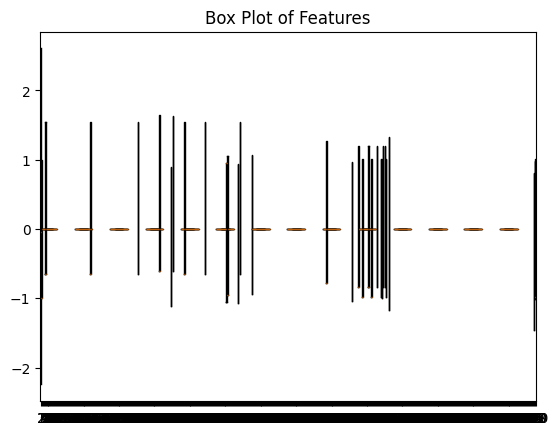

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(X_train)
plt.title("Box Plot of Features")
plt.show()

In [13]:
def _shuffle(X, Y):  # 打亂兩個長度相等的列表或數組 X 和 Y
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)  # 將這個序列隨機打亂
    return (X[randomize], Y[randomize])


def _sigmoid(z):  # 計算 Sigmoid 函數的值，常用於將邏輯回歸的輸出轉化為概率
    return np.clip(1 / (1.0 + np.exp(-z)), 1e-8, 1 - (1e-8))


def _f(X, w, b):  # 實現邏輯回歸模型函數，用於計算給定輸入 X 下，每個樣本被正標籤預測的概率
    return _sigmoid(np.matmul(X, w) + b)  # 得到邏輯回歸的線性輸出，然後通過 Sigmoid 函數轉化為概率


def _predict(X, w, b):  # 基於邏輯回歸模型的輸出，為每個輸入 X 的行生成一個預測（0 或 1）
    # 將函數的輸出結果四捨五入（np.round），將概率轉化為 0 或 1 的預測，然後轉換為整數
    return np.round(_f(X, w, b)).astype(int)


def _accuracy(Y_pred, Y_label):  # 計算預測準確率
    # 計算預測值 Y_pred 和實際標籤 Y_label 之間的平均絕對差異，然後用 1 減去這個值來得到準確率。
    acc = 1 - np.mean(np.abs(Y_pred - Y_label))
    return acc

In [14]:
# 計算交叉熵損失，這是一種衡量模型預測概率與實際標籤之間差異的方法，常用於分類問題。
def _cross_entropy_loss(y_pred, Y_label):
    cross_entropy = -np.dot(Y_label, np.log(y_pred)) - \
        np.dot((1 - Y_label), np.log(1 - y_pred))
    return cross_entropy

# 計算交叉熵損失對權重 w 和偏差 b 的梯度。這些梯度用於更新模型的權重和偏差，以最小化損失函數。
def _gradient(X, Y_label, w, b):
    # This function computes the gradient of cross entropy loss with respect to weight w and bias b.
    y_pred = _f(X, w, b)
    pred_error = Y_label - y_pred
    w_grad = -np.sum(pred_error * X.T, 1)
    b_grad = -np.sum(pred_error)
    return w_grad, b_grad

In [15]:
# 初始化權重 w 和偏差 b。這是訓練開始前的準備步驟。
w = np.random.randn(data_dim) * 0.01  # 小的隨機數初始化
b = np.zeros((1,))

# 訓練參數設置
max_iter = 50  # 增加迭代次數
batch_size = 16  # 調整批量大小
learning_rate = 0.1  # 調整學習率
learning_rate_decay = 0.95  # 學習率衰減

# 損失和準確率紀錄
train_loss = []
dev_loss = []
train_acc = []
dev_acc = []

step = 1

# 迭代訓練: 對於特定的迭代次數進行操作
for epoch in range(max_iter):
    
    # 學習率衰減
    if epoch % 10 == 0 and epoch > 0:
            learning_rate *= learning_rate_decay
    # 數據隨機打亂，在每次迭代開始時隨機打亂數據集，確保泛化能力
    X_train, Y_train = _shuffle(X_train, Y_train)
        
    # 小批量訓練: 將數據集分為多個小批量，並對梯度做計算以及下降更新
    for idx in range(int(np.floor(train_size / batch_size))):
        X = X_train[idx*batch_size:(idx+1)*batch_size]
        Y = Y_train[idx*batch_size:(idx+1)*batch_size]

        # 計算梯度: 使用 _gradient 函數計算當前批量數據的權重和偏差梯度
        w_grad, b_grad = _gradient(X, Y, w, b)
        
        w = w - learning_rate/np.sqrt(step) * w_grad
        b = b - learning_rate/np.sqrt(step) * b_grad

        step = step + 1
            
    # 輸出訓練和驗證集上的最終損失和準確率。
    y_train_pred = _f(X_train, w, b)
    Y_train_pred = np.round(y_train_pred)
    train_acc.append(_accuracy(Y_train_pred, Y_train))
    train_loss.append(_cross_entropy_loss(y_train_pred, Y_train) / train_size)

    y_dev_pred = _f(X_dev, w, b)
    Y_dev_pred = np.round(y_dev_pred)
    dev_acc.append(_accuracy(Y_dev_pred, Y_dev))
    dev_loss.append(_cross_entropy_loss(y_dev_pred, Y_dev) / dev_size)

print('Training loss: {}'.format(train_loss[-1]))
print('Development loss: {}'.format(dev_loss[-1]))
print('Training accuracy: {}'.format(train_acc[-1]))
print('Development accuracy: {}'.format(dev_acc[-1]))

Training loss: 0.3651690930178466
Development loss: 0.3668682930690163
Training accuracy: 0.8287528158918698
Development accuracy: 0.8247327681533358


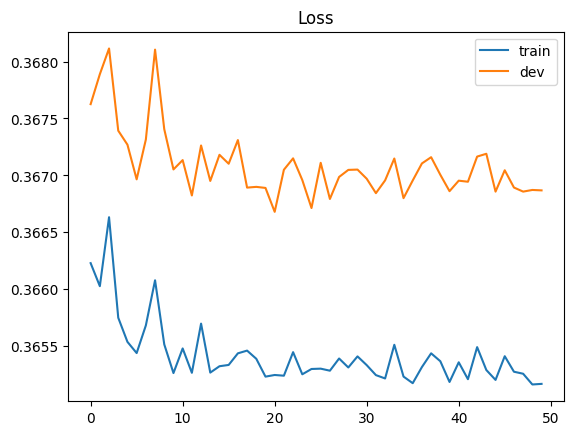

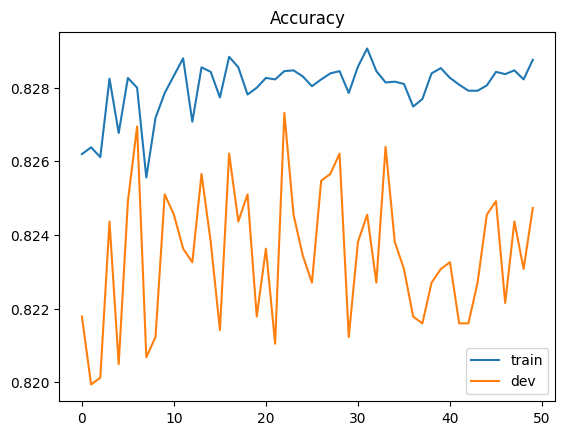

In [16]:
import matplotlib.pyplot as plt

# Loss 曲線
plt.plot(train_loss)
plt.plot(dev_loss)
plt.title('Loss')
plt.legend(['train', 'dev'])
plt.savefig('loss.png')
plt.show()

# Accuracy 曲線
plt.plot(train_acc)
plt.plot(dev_acc)
plt.title('Accuracy')
plt.legend(['train', 'dev'])
plt.savefig('acc.png')
plt.show()

In [17]:
# Predict testing labels
predictions = _predict(X_test, w, b)
with open(output_fpath.format('logistic'), 'w') as f:
    f.write('id,label\n')
    for i, label in enumerate(predictions):
        f.write('{},{}\n'.format(i, label))

# Print out the most significant weights
ind = np.argsort(np.abs(w))[::-1]
with open(X_test_fpath) as f:
    content = f.readline().strip('\n').split(',')
features = np.array(content)
for i in ind[0:10]:
    print(features[i], w[i])

 1 1.0513225396776678
id 0.6753817303497912
 Group Quarters- Secondary individual 0.511089051252586
 Associates degree-occup /vocational -0.5009264423448312
 PT for econ reasons usually FT -0.39701419242136
 Yes 0.3257522000047619
 Single 0.2765689837039127
 All other 0.2759335604556767
 Male -0.2736558799444595
 Grandchild <18 ever marr not in subfamily -0.2550967842736417


C:\Users\Tommy\AppData\Local\Temp\ipykernel_26692\2176769168.py:8: RuntimeWarning: overflow encountered in exp
  return np.clip(1 / (1.0 + np.exp(-z)), 1e-8, 1 - (1e-8))


In [18]:
# arse csv files to numpy array
with open(X_train_fpath) as f:
    next(f)
    X_train = np.array([line.strip('\n').split(',')[1:]
                       for line in f], dtype=float)
with open(Y_train_fpath) as f:
    next(f)
    Y_train = np.array([line.strip('\n').split(',')[1]
                       for line in f], dtype=float)
with open(X_test_fpath) as f:
    next(f)
    X_test = np.array([line.strip('\n').split(',')[1:]
                      for line in f], dtype=float)

# Normalize training and testing data
X_train, X_mean, X_std = _normalize(X_train, train=True)
X_test, _, _ = _normalize(X_test, train = False, specified_column = None, X_mean = X_mean, X_std = X_std)

In [19]:
# Compute in-class mean
X_train_0 = np.array([x for x, y in zip(X_train, Y_train) if y == 0])
X_train_1 = np.array([x for x, y in zip(X_train, Y_train) if y == 1])

mean_0 = np.mean(X_train_0, axis=0)
mean_1 = np.mean(X_train_1, axis=0)

# Compute in-class covariance
cov_0 = np.zeros((data_dim, data_dim))
cov_1 = np.zeros((data_dim, data_dim))

for x in X_train_0:
    cov_0 += np.dot(np.transpose([x - mean_0]),
                    [x - mean_0]) / X_train_0.shape[0]
for x in X_train_1:
    cov_1 += np.dot(np.transpose([x - mean_1]),
                    [x - mean_1]) / X_train_1.shape[0]

# Shared covariance is taken as a weighted average of individual in-class covariance.
cov = (cov_0 * X_train_0.shape[0] + cov_1 * X_train_1.shape[0]
       ) / (X_train_0.shape[0] + X_train_1.shape[0])

In [20]:
# Compute inverse of covariance matrix.
# Since covariance matrix may be nearly singular, np.linalg.inv() may give a large numerical error.
# Via SVD decomposition, one can get matrix inverse efficiently and accurately.
u, s, v = np.linalg.svd(cov, full_matrices=False)
inv = np.matmul(v.T * 1 / s, u.T)

# Directly compute weights and bias
w = np.dot(inv, mean_0 - mean_1)
b = (-0.5) * np.dot(mean_0, np.dot(inv, mean_0)) + 0.5 * np.dot(mean_1, np.dot(inv, mean_1))\
    + np.log(float(X_train_0.shape[0]) / X_train_1.shape[0])

# Compute accuracy on training set
Y_train_pred = 1 - _predict(X_train, w, b)
print('Training accuracy: {}'.format(_accuracy(Y_train_pred, Y_train)))

Training accuracy: 0.8690098790917133


In [21]:
# Predict testing labels
predictions = 1 - _predict(X_test, w, b)
with open(output_fpath.format('generative'), 'w') as f:
    f.write('id,label\n')
    for i, label in enumerate(predictions):
        f.write('{},{}\n'.format(i, label))

# Print out the most significant weights
ind = np.argsort(np.abs(w))[::-1]
with open(X_test_fpath) as f:
    content = f.readline().strip('\n').split(',')
features = np.array(content)
for i in ind[0:10]:
    print(features[i], w[i])

 Retail trade 6.53173828125
 41 5.7802734375
 Agriculture -5.7724609375
 29 -5.642578125
 Other professional services -5.642578125
 44 5.6416015625
 Forestry and fisheries 5.388671875
 West 5.2906494140625
 Abroad -5.064453125
 34 -4.98046875
